# The Birthday Problem

In [16]:
# code generated allmost completely by ChatGPT by asking 
# """
# I want code in python to compute the probabilities of the birthday problem and plot them
# I also want you to add to this code simulation code that plots monte carlo estimates on it.
# """

In [ ]:
# !pip install matplotlib numpy

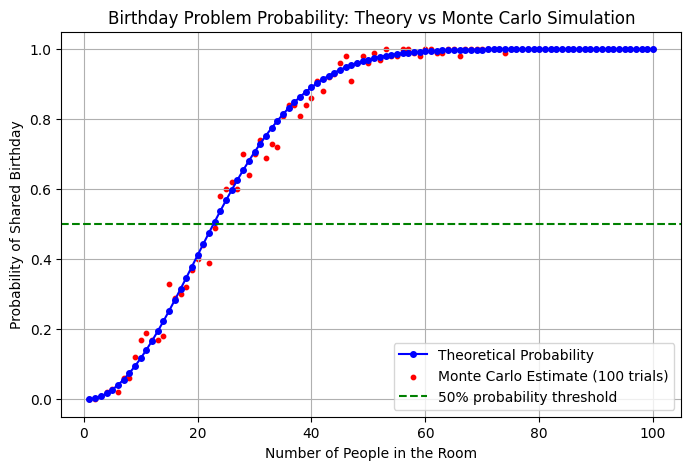

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def birthday_problem_probability(n):
    """Computes the probability that at least two people in a group of `n` share the same birthday analytically."""
    if n > 365:
        return 1.0  # More than 365 people must have a duplicate
    prob_unique = 1.0
    for i in range(n):
        prob_unique *= (365 - i) / 365  # Probability that all birthdays are unique
    return 1 - prob_unique  # Probability that at least one birthday is shared

def monte_carlo_birthday_simulation(n, trials=10):
    """Estimates the probability using a Monte Carlo simulation."""
    count_shared_birthday = 0
    for _ in range(trials):
        birthdays = np.random.randint(0, 365, size=n)  # Assign random birthdays
        if len(birthdays) != len(set(birthdays)):  # Check for duplicates
            count_shared_birthday += 1
    return count_shared_birthday / trials

# Compute probabilities for different group sizes
group_sizes = np.arange(1, 101)  # From 1 to 100 people
theoretical_probabilities = [birthday_problem_probability(n) for n in group_sizes]

# Monte Carlo simulation for each group size
trials = 100  # Number of simulations per group size
simulated_probabilities = [monte_carlo_birthday_simulation(n, trials) for n in group_sizes]

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(group_sizes, theoretical_probabilities, marker='o', ms=4, linestyle='-', color='b', label="Theoretical Probability")
plt.scatter(group_sizes, simulated_probabilities, color='r', s=10, label=f"Monte Carlo Estimate ({trials} trials)")
plt.axhline(y=0.5, color='g', linestyle='--', label="50% probability threshold")
plt.xlabel("Number of People in the Room")
plt.ylabel("Probability of Shared Birthday")
plt.title("Birthday Problem Probability: Theory vs Monte Carlo Simulation")
plt.legend()
plt.grid()
plt.show()